In [1]:
import json
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Set the default font to be LaTeX compliant.
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["text.usetex"] = True

# Set a global font size.
font_size = 11
plt.rcParams["font.size"] = font_size
plt.rcParams["axes.labelsize"] = font_size
plt.rcParams["xtick.labelsize"] = font_size
plt.rcParams["ytick.labelsize"] = font_size
plt.rcParams["legend.fontsize"] = 10

In [3]:
plot_colors = [
    "darkred",
    "darkgreen",
    "darkblue",
    "darkmagenta",
    "darkcyan",
    "magenta",
    "green",
    "goldenrod",
    "black",
    "orange",
    "purple"
]

In [4]:
data_dir = Path("data")
json_files = sorted(data_dir.glob("vqe-time-rel-noise-experement_*.json"))

# Load all JSONs into a list
data_list = []
for f in json_files:
    with open(f, "r") as file:
        data_list.append(json.load(file))

# Example: check first element
print(data_list[0])


{'config': {'run': 'vqe-bigT-simulation-noisy', 'bigT': [5, 10, 15, 20, 30, 40, 50], 'C': 0.01, 'del_t': 0.1, 'nqubits': 5, 'state': 'dmatrix', 'output': {'file_name_prefix': 'vqe-time-rel-noise-experement', 'draw': {'status': False, 'fig_dpi': 100, 'type': 'png'}}, 'observable': {'def': 'ising', 'coefficients': {'cn': [0.5, 0.5, 0.5, 0.5], 'bn': [1.0, 1.0, 1.0, 1.0, 1.0], 'r': 1}}, 'ansatz': {'layer': 20, 'gateset': 1, 'ugate': {'type': 'heisenberg', 'coefficients': {'cn': [0.5, 0.5, 0.5, 0.5], 'bn': [1.0, 1.0, 1.0, 1.0, 1.0], 'r': 0}, 'time': {'min': 0.0, 'max': 5}}}, 'vqe': {'iteration': 10, 'optimization': {'status': True, 'algorithm': 'SLSQP', 'constraint': True}}, 'init_param': {'value': 'random'}, 'noise_profile': {'status': False, 'type': 'dephasing', 'noise_prob': [0.001, 0.001, 0.0, 0.0], 'noise_on_init_param': {'status': False, 'value': 0}}, 'redundant': {'identity_factors': [[0, 0, 0, 0], [1, 1, 1, 1]]}, 'zne': {'method': 'richardson', 'degree': 1, 'sampling': 'default', 'd

In [5]:
EXACT_SOLUTION: float = -6.026674183332271
DELTA_T = 0.1
C = 0.01

In [6]:
data_analysis = []
for data in data_list:
    temp_cost_list = data["output"]["optimized_minimum_cost"]
    t_max = data["config"]["ansatz"]["ugate"]["time"]["max"]
    cost_mean = np.mean(temp_cost_list)
    cost_std = np.std(temp_cost_list)
    data_analysis.append([[cost_mean, cost_std], t_max])

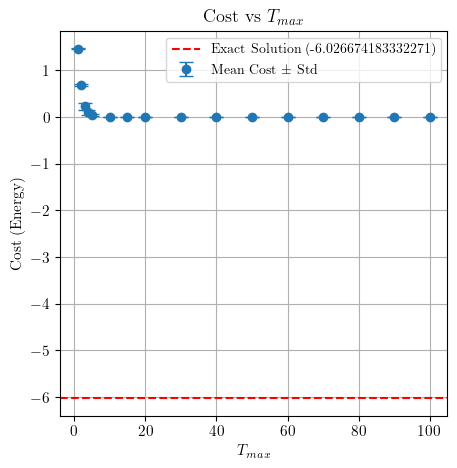

In [7]:
# Extract data for plotting


t_values = [item[1] for item in data_analysis]           # t_max values on x-axis
cost_means = [item[0][0] for item in data_analysis]      # mean cost
cost_stds = [item[0][1] for item in data_analysis]       # std cost

# Plot mean with std as error bars (points only, no connecting line)
plt.figure(figsize=(5,5))
plt.errorbar(t_values, cost_means, yerr=cost_stds, fmt='o', capsize=5, label='Mean Cost ± Std')

# Plot exact solution as a horizontal line
plt.axhline(y=EXACT_SOLUTION, color='red', linestyle='--', label=f'Exact Solution ({EXACT_SOLUTION})')

# Labels and title
plt.xlabel('$T_{max}$')
plt.ylabel('Cost (Energy)')
plt.title("Cost vs $T_{max}$")
plt.grid(True)
plt.legend()
plt.show()
